 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [1]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt
import random

import torch
import torchvision
import tensorflow as tf

from torchvision import transforms            #
from tqdm.notebook import tqdm                # добавляет строку прогресса 
from sklearn.metrics import accuracy_score    # метрика оценки работы алгоритма

Скачаем обучающую и контрольную выборки.

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=8)

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?

In [ ]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
trainloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [ ]:
testloader.dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [ ]:
trainset.data.shape, testset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?

In [ ]:
tf.unique_with_counts(trainset.targets)

UniqueWithCounts(y=<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8])>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 1, ..., 2, 1, 5], dtype=int32)>, count=<tf.Tensor: shape=(10,), dtype=int32, numpy=
array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int32)>)

In [ ]:
y, idx, count = tf.unique_with_counts(trainset.targets)

In [ ]:
print(idx)

tf.Tensor([0 1 1 ... 2 1 5], shape=(60000,), dtype=int32)


In [ ]:
print('trainset.targets')
[ str(y_i.numpy()) + '-' + str(count_i.numpy()) for y_i, _, count_i in zip(y, idx, count) ]

trainset.targets


['9-6000',
 '0-6000',
 '3-6000',
 '2-6000',
 '7-6000',
 '5-6000',
 '1-6000',
 '6-6000',
 '4-6000',
 '8-6000']

In [ ]:
def is_uniform_distribution(dataset):
  y, idx, count = tensorflow.unique_with_counts(dataset)
  count_diff_counts = 0
  counter = count[0]

  print(count)

  for i in range(len(count)):
    if count[i] != counter:
      print(y[i], ' by index ', i, ' with count ', count[i], ' differ')
      count_diff_counts += 1
  if count_diff_counts == 0:
    return True
  else:
    return False

In [ ]:
is_uniform_distribution(trainset.targets)

tf.Tensor([6000 6000 6000 6000 6000 6000 6000 6000 6000 6000], shape=(10,), dtype=int32)


True

In [ ]:
is_uniform_distribution(testset.targets)

tf.Tensor([1000 1000 1000 1000 1000 1000 1000 1000 1000 1000], shape=(10,), dtype=int32)


True

* Выведите несколько картинок с помощью `pyplot`

In [ ]:
def show_img(dataset, in_len, elem_num = 1):
  if elem_num < 4: col = elem_num
  else: col = 4
  if elem_num % 4 >= 1 or elem_num < 4: row = 1
  else: row = 0
  row += elem_num // 4
  #print( col, row)
  fig, axs = plt.subplots(ncols = col, nrows = row, figsize=(12,3*row))
  
  for ax in axs.flat:
    ax.imshow(dataset[random.randint(1,in_len),:])

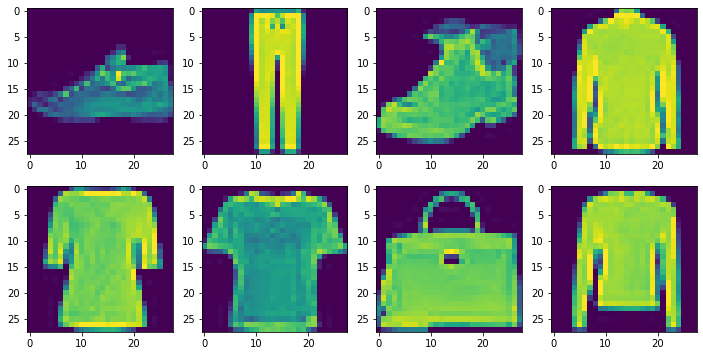

In [ ]:
show_img(trainset.data, trainset.data.shape[0], 8)

Общие элементы

In [4]:
def plot(y, x_label, y_label, title):
  x = np.arange(len(y))
  plt.figure(figsize=(15,10))
  plt.plot(y)
  plt.grid(True)
  for i in range(len(y)):
    plt.text(i, y[i], str(y[i]))
    #plt.text(x, y, str(y), horizontalalignment='center', verticalalignment='center')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет

Значения в скрытом слое менять не будем

In [5]:
D_inp = trainset.data.shape[1]*trainset.data.shape[2] # входное изображение 28* 28 = 784 пикселя
H = 128                                               # полносвязный слой состоит из 128 нейронов
D_out = len(trainset.classes)                         # 10 классов выхода
print(D_inp, H, D_out)

mlp = torch.nn.Sequential(
    torch.nn.Linear(D_inp, H),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H, H),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H, H),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H, D_out)
)
mlp

784 128 10


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=128, out_features=10, bias=True)
)

Существуют расширения jupiter, позволяющие показать процесс выполнения ячейки, но у меня не получилось настроить расширения.

tqdm - альтернатива, которую можно использовать на первых этапах написания нейросети для проверки прохождения алгоритмом этапов обучения по батчам в данном случае. 

In [ ]:
# mlp.model.fit(trainloader, trainset.targets, epochs=10)

In [17]:
loss_fn = torch.nn.CrossEntropyLoss()
losses_mlp = []

learning_rate = 1e-4
#optimizer_sgd = torch.optim.SGD(mlp.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

epochs_num = 10

for epoch in range(epochs_num):
  running_loss = 0

  for i,(images, labels) in enumerate(trainloader):        # без отрисовки прогресса
  #for i,(images, labels) in tqdm(enumerate(trainloader)): # с отрисовкой прогресса
    y_pred_mlp = mlp(images.view(images.shape[0], -1))
    loss = loss_fn(y_pred_mlp, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
          
    running_loss += loss.item()

  losses_mlp.append(running_loss / i)

In [18]:
losses_mlp

[0.8981883765348375,
 0.5213102201196657,
 0.4630615794226098,
 0.43221437291758036,
 0.4114854217625224,
 0.39668829476693396,
 0.38573665108249433,
 0.3726324812134404,
 0.3624405763574191,
 0.3544128141351036]

Так как количество эпох выбрано небольшое, в график добавлены подписи. 
В случае многократного увеличения количества эпох подписи следует убрать для лучшего (чистого) восприятия.

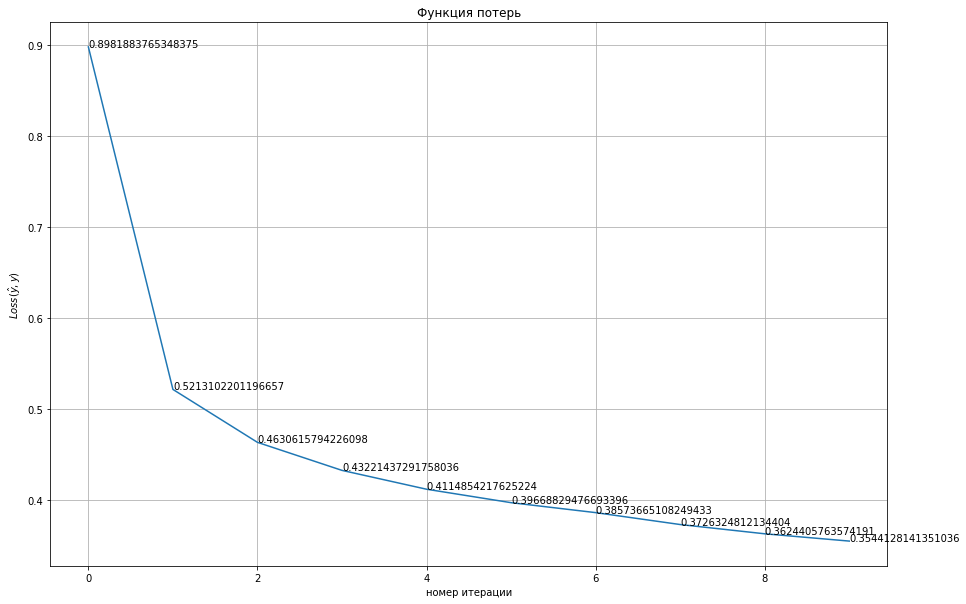

In [19]:
plot(losses_mlp, 'номер итерации', '$Loss(\hat{y}, y)$', 'Функция потерь')

Протестируем работу модели mlp на тестовых данных и сохраним в перменную для дальнейшего сравнения точности работы двух моделей, на следующем этапе. 

In [20]:
mlp_test_pred = []
with torch.no_grad():
    for _, (images, labels) in enumerate(testloader):
        y_pred = mlp(images.view(images.shape[0], -1))
        _, predicted = torch.max(y_pred, 1)
        mlp_test_pred.append(predicted.tolist())
mlp_test_pred = [label for batch in mlp_test_pred for label in batch]

print(f'Prediction accuracy of mlp on test: {accuracy_score(testset.targets, mlp_test_pred) * 100} %')

Prediction accuracy of mlp on test: 86.1 %


2. Свёрточную сеть, классифицирующую этот датасет


Чтобы создать нейронную сеть в PyTorch, используется класс nn.Module. Причем важно не нарушать наследование. 
Перепишем базовый класс для конструиврования модели или прямого прохождения через сеть - forward.

После определения скелета архитектуры сети, необходимо задать принципы, по которым данные будут перемещаться по ней. Это делается с помощью определяемого метода forward(),  который переписывает фиктивный метод в базовом классе и требует определения для каждой сети. 

In [10]:
# Convolutional Neural Network
class CNN(torch.nn.Module):
  # инициализируем базовый класс
    def __init__(self):
        super(CNN, self).__init__()                                         # superсоздает объект базового класса
        self.dropout = torch.nn.Dropout(p=0.2)                                        # выбор значимых единиц для распознавания/ отсев
        # 3 строки сверточных нейронных слоев
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)    # слой свертки
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)                       # Пулинг или слой субдискретизации
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
                                                                                      # весовая матрица полносвязный слой с 16 входами и 4 выходами
        self.fc1 = torch.nn.Linear(16 * 4 * 4, 120)                                   # несколько 
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)                                            # 10 категорий

    def forward(self, x):
        x = self.pool(torch.nn.functional.leaky_relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.leaky_relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.nn.functional.leaky_relu(self.fc1(x))
        x = torch.nn.functional.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x    

In [11]:
cnn = CNN()
cnn

CNN(
  (dropout): Dropout(p=0.2, inplace=False)
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
loss_fn = torch.nn.CrossEntropyLoss()
losses_cnn = [] = []

learning_rate = 1e-4
optimizer_adam = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

epochs_num = 10

for epoch in range(epochs_num):
  running_loss = 0

  for i,(images, labels) in enumerate(trainloader):        # без отрисовки прогресса
  #for i,(images, labels) in tqdm(enumerate(trainloader)): # с отрисовкой прогресса
    y_pred_cnn = cnn(images)
    loss = loss_fn(y_pred_cnn, labels)
    optimizer_adam.zero_grad()
    loss.backward()
    optimizer_adam.step()
          
    running_loss += loss.item()

  losses_cnn.append(running_loss / i)

In [13]:
losses_cnn

[1.0758541444258858,
 0.674030487094643,
 0.6074266936570374,
 0.5648188639984822,
 0.5328155882107919,
 0.5070820493084899,
 0.4852317012965743,
 0.4669846306488379,
 0.45142747339342293,
 0.43790857376194814]

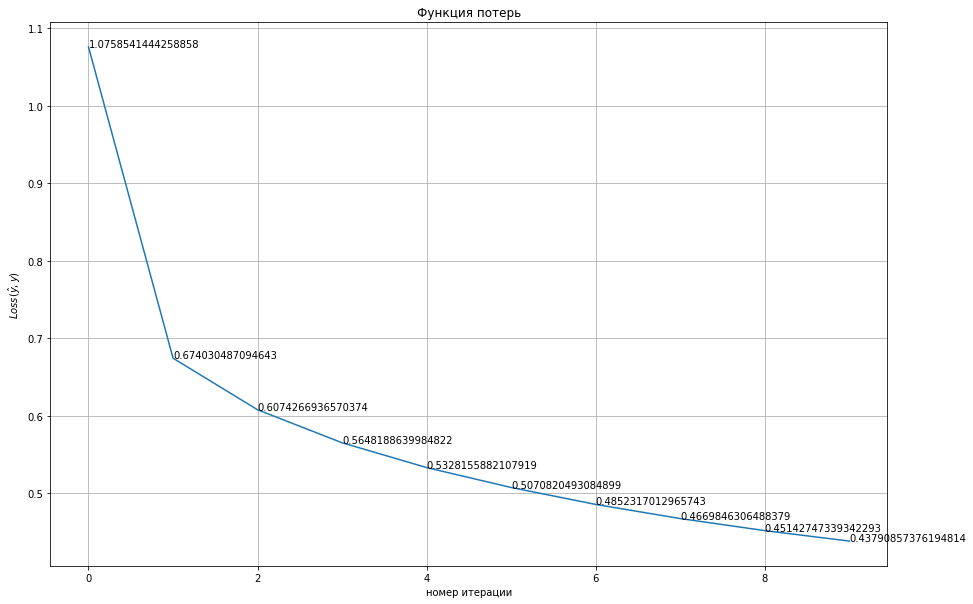

In [14]:
plot(losses_cnn, 'номер итерации', '$Loss(\hat{y}, y)$', 'Функция потерь')

In [23]:
cnn_test_pred = []
with torch.no_grad():
    for _, (images, labels) in enumerate(testloader):
        y_pred_cnn = cnn(images)
        _, predicted = torch.max(y_pred_cnn, 1)
        cnn_test_pred.append(predicted.tolist())
cnn_test_pred = [label for batch in cnn_test_pred for label in batch]

print(f'Prediction accuracy of cnn on test: {accuracy_score(testset.targets, cnn_test_pred) * 100} %')

Prediction accuracy of cnn on test: 83.86 %


3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [24]:
print(f'Prediction accuracy of cnn on test: {accuracy_score(testset.targets, cnn_test_pred) * 100} %')
print(f'Prediction accuracy of mlp on test: {accuracy_score(testset.targets, mlp_test_pred) * 100} %')

Prediction accuracy of cnn on test: 83.86 %
Prediction accuracy of mlp on test: 86.1 %


In [ ]:
# model = fit(net_conv, 15, trainloader)

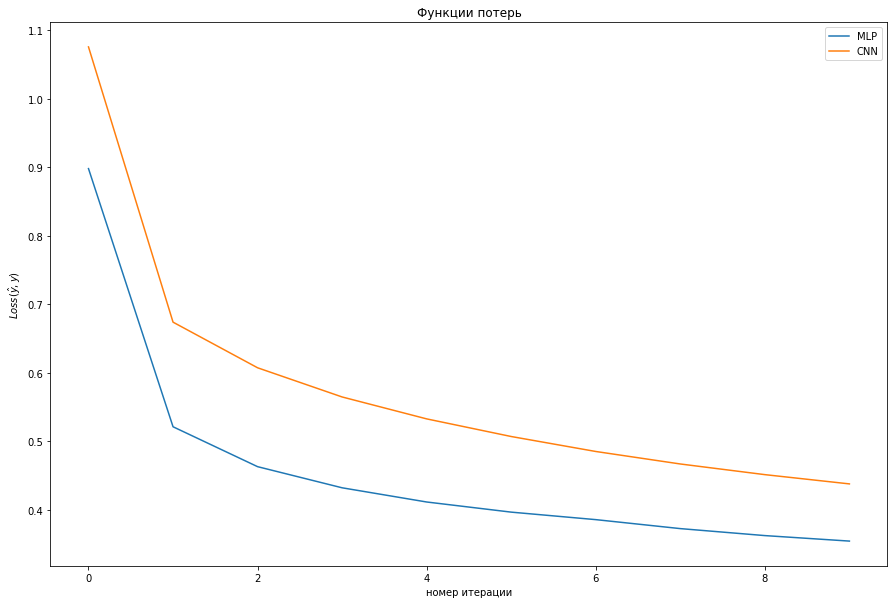

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(losses_mlp, label='MLP')
ax.plot(losses_cnn, label='CNN')
ax.set_title('Функции потерь')
ax.set_xlabel('номер итерации')
ax.set_ylabel('$Loss(\hat{y}, y)$')
ax.legend()